# Usage of PyGenetic to solve N-Queens

#### In this example we are going to walk through the usage of GAEngine to solve the N-Queens problem 
#### The objective would be to place queens on single board such that all are in safe position
#### Each configuration of board represents a potential candidate solution for the problem
#### But to find  the optimal solution each candidate will be tested for fitness value which would represent the number of queens safely placed on board . The operations for performing selection, crossover and mutation are present in Utils.py module under respective classes . There is also support for adaptively changing mutation after every iteration which is represented by adaptive mutation instance  variable of GAEngine. Changing mutation rate helps increase the diversity of candidates which can lead to finding optimal solutions quicker. The number of iterations can be set by user.

<img src="nQueens.png">

In [2]:
import sys 
sys.path.append('../../pyGenetic/')

import GAEngine, ChromosomeFactory, Utils,Statistics
import matplotlib.pyplot as plt


### Fitness function for n Queens
- Higher fitness value corresponds to higher number of queens safely placed on board

In [3]:
def fitness(board):
		fitness = 0
		for i in range(len(board)):
			isSafe = True
			for j in range(len(board)):
				if i!=j:
					if (board[i] == board[j]) or (abs(board[i] - board[j]) == abs(i-j)):
						isSafe = False
						break
			if(isSafe==True):
				fitness += 1
		return fitness

    


### Usage of modules from pygenetic to solve the nqueens
- ChromosomeRangeFactory generates the initial population of candidate solutions
- Here the noOfGenes are 14 corresponding to the 14 by 14 dimensions of chess board
- GAEngine is the main driver class that calls the operations necessary
- In below case the population size for each iteration is 100

In [4]:
factory = ChromosomeFactory.ChromosomeRangeFactory(14,1,15)
ga = GAEngine.GAEngine(factory,100,fitness_type=('equal',14),mut_prob = 0.3)
#ga.addCrossoverHandler(Utils.CrossoverHandlers.PMX, 9)




First men =  [[1, 9, 8, 2, 3, 6, 4, 5, 13, 11, 10, 14, 7, 12], [13, 5, 11, 10, 12, 3, 4, 1, 14, 8, 9, 6, 7, 2], [5, 14, 12, 8, 3, 1, 13, 6, 11, 9, 7, 4, 10, 2], [3, 6, 1, 4, 12, 14, 9, 5, 8, 7, 10, 11, 13, 2], [14, 5, 9, 6, 2, 13, 11, 12, 7, 4, 10, 8, 1, 3], [2, 3, 5, 7, 8, 9, 4, 10, 14, 11, 1, 13, 6, 12], [4, 13, 11, 9, 2, 7, 5, 6, 3, 1, 12, 14, 8, 10], [2, 7, 1, 12, 8, 5, 10, 14, 6, 3, 4, 9, 11, 13], [8, 13, 9, 7, 1, 10, 5, 3, 14, 2, 12, 11, 6, 4], [2, 12, 11, 4, 14, 8, 10, 13, 1, 3, 6, 5, 7, 9], [11, 9, 3, 4, 12, 14, 8, 13, 2, 10, 7, 6, 1, 5], [7, 13, 4, 1, 9, 10, 6, 8, 3, 2, 12, 5, 14, 11], [6, 7, 10, 4, 12, 2, 14, 11, 13, 3, 1, 9, 8, 5], [9, 11, 6, 2, 8, 5, 7, 13, 4, 3, 10, 1, 14, 12], [6, 13, 1, 4, 12, 2, 8, 9, 11, 7, 14, 5, 10, 3], [1, 10, 8, 6, 3, 14, 4, 2, 12, 5, 11, 7, 13, 9], [13, 9, 7, 11, 2, 12, 1, 10, 4, 3, 8, 6, 5, 14], [13, 7, 12, 1, 3, 10, 2, 11, 9, 6, 4, 5, 14, 8], [7, 12, 11, 8, 4, 5, 10, 1, 9, 3, 14, 2, 6, 13], [4, 12, 1, 2, 3, 11, 10, 9, 8, 6, 5, 13, 14, 7], [12, 9

- The functions for performing crossover , mutation, selection and fitness function are present in Utils.py module as static methods 
- Here we register the specific operations to be used by GAEngine 

In [6]:
ga.addCrossoverHandler(Utils.CrossoverHandlers.distinct, 4)
#ga.addCrossoverHandler(Utils.CrossoverHandlers.OX, 3)
ga.addMutationHandler(Utils.MutationHandlers.swap)
ga.setSelectionHandler(Utils.SelectionHandlers.largest)
ga.setFitnessHandler(fitness)

- Calling the evolve function defined in Evolution.py module to perform each iteration
- function expects the number of iterations to be performed as argument , here 100

In [7]:
ga.evolve(100)


mutation_handlers_weights =  [0.5, 1.0]
crossover_handlers_weights =  [0.5, 1.0]
Best member =  [12, 6, 8, 10, 5, 1, 14, 4, 3, 7, 9, 11, 13, 2]
Best fitness =  10
Diversity =  0.17254567626614306
Adaptive mutation value =  0.589822861547702
Best member =  [12, 6, 8, 10, 5, 1, 14, 4, 3, 7, 9, 11, 13, 2]
Best fitness =  10
Diversity =  0.12733632189230076
Adaptive mutation value =  0.5924558846761885
Best member =  [2, 1, 8, 3, 7, 4, 14, 11, 13, 6, 10, 12, 5, 9]
Best fitness =  9
Diversity =  0.10352579295301559
Adaptive mutation value =  0.5931767672015722
Best member =  [11, 7, 4, 10, 12, 2, 9, 6, 1, 14, 5, 3, 8, 13]
Best fitness =  10
Diversity =  0.10231523725809065
Adaptive mutation value =  0.5939232600732506
Best member =  [9, 11, 8, 2, 7, 13, 1, 14, 6, 10, 12, 5, 4, 3]
Best fitness =  11
Diversity =  0.10064948737997452
Adaptive mutation value =  0.5945598054873599
Best member =  [9, 11, 8, 2, 7, 13, 1, 14, 6, 10, 12, 5, 4, 3]
Best fitness =  11
Diversity =  0.09815481867479993
A

- The functionality for plotting the best, worst, average fitness values across iterations is present in plot_statistics function of statistics.py module.
- The diversity and mutation rate values over iterations can also be visualized 

best [10, 10, 9, 10, 11, 11, 10, 10, 11, 10, 10, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
worst [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
avg [3.96, 3.888888888888889, 4.254098360655738, 4.462837837837838, 4.654761904761905, 4.654891304347826, 4.774111675126903, 4.853365384615385, 4.881944444444445, 4.885650224215246, 5.046052631578948, 4.993534482758621, 4.968220338983051, 5.073221757322176, 5.070539419087137, 5.148148148148148, 5.036885245901639, 5.222448979591837, 5.189024390243903, 5.416161616161616, 5.272177419354839, 5.320564516129032, 5.348790322580645, 5.342741935483871, 5.13508064516129, 5.23991935483871, 5.23991935483871, 5.070564516129032, 5.155241935483871, 5.137096774193548, 5.268145161290323, 5.318548387096774]


C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'v' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


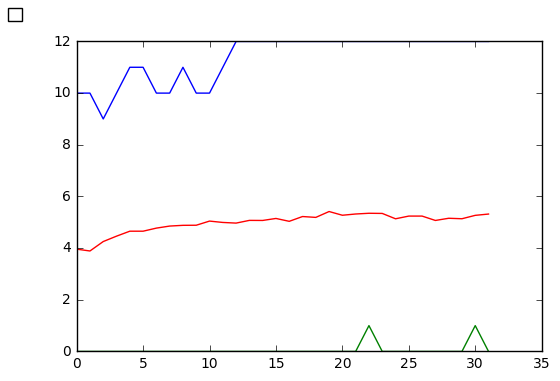

diversity [0.17254567626614306, 0.12733632189230076, 0.10352579295301559, 0.10231523725809065, 0.10064948737997452, 0.09815481867479993, 0.10000363731364795, 0.1001474327337953, 0.09467709511449247, 0.09391792407358406, 0.09508165816599201, 0.09976052345908505, 0.1008044503671048, 0.09959356616045201, 0.10629493282692547, 0.09934335170665312, 0.10235772671744833, 0.10632540153866026, 0.10107413653874946, 0.10367383264103909, 0.10773878289554979, 0.10606697954574291, 0.106123089302271, 0.10629143665785064, 0.10471166176280632, 0.10319238974924522, 0.10324083325815775, 0.10100192306201192, 0.0978741276353467, 0.0991862735140919, 0.09784639344860094, 0.09784639344860094]
mutation_rate [0.589822861547702, 0.5924558846761885, 0.5931767672015722, 0.5939232600732506, 0.5945598054873599, 0.5946934520046718, 0.5940591920020191, 0.5940507344035855, 0.5948798638678984, 0.5944173555929402, 0.594348832745355, 0.5946074229305266, 0.5950017645133974, 0.5950613101696742, 0.5947319175643722, 0.59507361

C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'm' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib

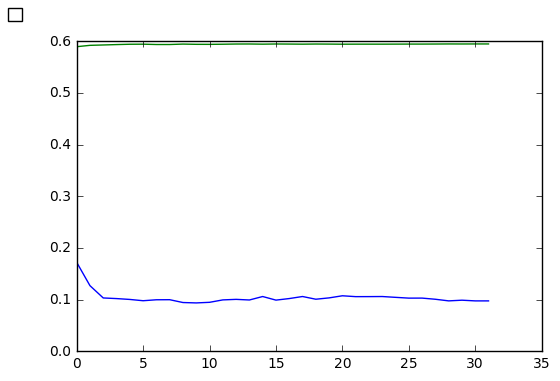

In [8]:
fig = ga.statistics.plot_statistics(['best','worst','avg'])
plt.show()
fig = ga.statistics.plot_statistics(['diversity','mutation_rate'])
plt.show()